<p style="text-align:center">
    <a href="https://www.linkedin.com/company/galois-insights-limited/" target="_blank">
    <img src="https://drive.google.com/uc?export=view&id=1V_W0UD5Ihsi9VjZEsFvLoAC2mnzd5sKN" width="300" alt="Galois Insights Limited Logo"  />   
    <center>iAnalyse Mentorship Program<center>
     <center>Group 4<center>
    </a>
</p>

# Diabetes Prediction Imbalenced dataset

#### Problem Statement for Diabetes Prediction
Diabetes is a prevalent and chronic metabolic disorder that affects individuals across
various demographic segments. Early detection is pivotal for timely intervention and tailored
medical guidance. 
#### Project Objective
Leveraging a dataset encompassing diverse patient information (age, gender, pregnancy history, glucose levels, blood pressure, skinthickness, insulin levels, BMI (Body Mass Index), diabetes pedigree function, hypertension,
heart disease, smoking history, and HbA1c levels), our goal is to develop a
predictive model capable of discerning individuals who are at risk of developing diabetes 

#### Hypothesis Generation

After looking at the problem statement, we will now move into hypothesis generation. 
It is the process of listing out all the possible factors that can affect the target.

Hypothesis 1 : Women are more likely to have diabetes than men.

Hypothesis 2 : Older individuals are more likely to have diabetes.

Hypothesis 3 : The number of pregnancies is positively correlated with diabetes risk.
    
Hypothesis 4 : High levels of Glucose are associated with a higher risk of diabetes.

Hypothesis 5 : Individuals with higher BMI are more likely to have diabetes.


#### Getting the System Ready and Loading the Data

In [1]:
#imports and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings               # To ignore any warnings
warnings.filterwarnings("ignore")
df= pd.read_csv("D:/iAnalayse_mentorship/Mini_Project_G4/diabetes.csv")

df

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,Female,80.0,6,148,72,35,0,33.6,0.627,0,1,never,6.6,1
1,Female,54.0,1,85,66,29,0,26.6,0.351,0,0,No Info,6.6,0
2,Male,28.0,0,183,64,0,0,23.3,0.672,0,0,never,5.7,1
3,Female,36.0,1,89,66,23,94,28.1,0.167,0,0,current,5.0,0
4,Male,76.0,0,137,40,35,168,43.1,2.288,1,1,current,4.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Female,66.0,10,101,76,48,180,32.9,0.171,0,0,former,5.7,0
764,Male,15.0,0,122,70,27,0,36.8,0.340,0,0,never,3.5,0
765,Female,21.0,5,121,72,23,112,26.2,0.245,0,0,ever,3.5,0
766,Female,23.0,1,126,60,0,0,30.1,0.349,0,0,never,6.0,1


## 1) Understanding the Data

#### Display Top 5 Rows of The Dataset

In [2]:
df.head(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,Female,80.0,6,148,72,35,0,33.6,0.627,0,1,never,6.6,1
1,Female,54.0,1,85,66,29,0,26.6,0.351,0,0,No Info,6.6,0
2,Male,28.0,0,183,64,0,0,23.3,0.672,0,0,never,5.7,1
3,Female,36.0,1,89,66,23,94,28.1,0.167,0,0,current,5.0,0
4,Male,76.0,0,137,40,35,168,43.1,2.288,1,1,current,4.8,1


#### Check Last 5 Rows of The Dataset

In [3]:
df.tail(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
763,Female,66.0,10,101,76,48,180,32.9,0.171,0,0,former,5.7,0
764,Male,15.0,0,122,70,27,0,36.8,0.340,0,0,never,3.5,0
765,Female,21.0,5,121,72,23,112,26.2,0.245,0,0,ever,3.5,0
766,Female,23.0,1,126,60,0,0,30.1,0.349,0,0,never,6.0,1
767,Male,5.0,0,93,70,31,0,30.4,0.315,0,0,No Info,5.0,0


#### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [4]:
print("The Number of Rows in our Dataset is ", df.shape[0])
print("The Number of Columns in our Dataset is ", df.shape[1])

The Number of Rows in our Dataset is  768
The Number of Columns in our Dataset is  14


In [5]:
df.columns

Index(['gender', 'age', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level',
       'diabetes'],
      dtype='object')

We have 13 independents variables and 1 target variable, i.e, diabetes

#### Let's cheik the types of the variables

In [6]:
df.dtypes

gender                       object
age                         float64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
hypertension                  int64
heart_disease                 int64
smoking_history              object
HbA1c_level                 float64
diabetes                      int64
dtype: object

#### We can see there are three formats of data types:

###### object: Object format means variables are categorical. 
Categorical variables in our dataset are: gender, smoking_history 

###### int64: It represents the integer variables.
Integers variables in our dataset are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,hypertension ,heart_disease, diabetes  

###### float64: It represents the variable that has some decimal values involved. They are also numerical variables. 
Numerical variables in our dataset are:age, BMI,DiabetesPedigreeFunction, HbA1c_level.    

####  Check Null Values In The Dataset

In [7]:
df.isnull().sum()

gender                      0
age                         0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
hypertension                0
heart_disease               0
smoking_history             0
HbA1c_level                 0
diabetes                    0
dtype: int64

The inference we  get is that there are no missing values 
but that can not actually be a true story as in this particular dataset all the missing values 
were given the 0 as a value which is not good for the authenticity of the dataset. 

#### summary of the dataset

In [8]:
df.describe()

,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,HbA1c_level,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,41.258594,2.190104,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,0.070312,0.031250,5.586328,0.348958
std,22.955406,3.129171,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,0.255840,0.174106,1.117192,0.476951
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000,3.500000,0.000000
25%,22.000000,0.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,0.000000,0.000000,4.800000,0.000000
50%,42.000000,0.500000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,0.000000,0.000000,5.800000,0.000000
75%,59.000000,4.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,0.000000,0.000000,6.200000,1.000000
max,80.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.000000,9.000000,1.000000


##### Oservation :
ln the above table , the min value of columns **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI**, **hypertension**, **heart disease** is zero (0).lt is clear that this values can't be zero.So we are
going to impute mean values of these respective columns instead of zero.

## Data cleaning

##### Drop the Duplicates

check is there any duplicate rows are exist or not , if exist then we shold remove from the dataframe.

In [9]:
# check the shape before drop the duplicates
print("The Number of Rows in our Dataset is ", df.shape[0])
print("The Number of Columns in our Dataset is ", df.shape[1])

The Number of Rows in our Dataset is  768
The Number of Columns in our Dataset is  14


In [10]:
df.size

10752

In [11]:
df.drop_duplicates()

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,Female,80.0,6,148,72,35,0,33.6,0.627,0,1,never,6.6,1
1,Female,54.0,1,85,66,29,0,26.6,0.351,0,0,No Info,6.6,0
2,Male,28.0,0,183,64,0,0,23.3,0.672,0,0,never,5.7,1
3,Female,36.0,1,89,66,23,94,28.1,0.167,0,0,current,5.0,0
4,Male,76.0,0,137,40,35,168,43.1,2.288,1,1,current,4.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Female,66.0,10,101,76,48,180,32.9,0.171,0,0,former,5.7,0
764,Male,15.0,0,122,70,27,0,36.8,0.340,0,0,never,3.5,0
765,Female,21.0,5,121,72,23,112,26.2,0.245,0,0,ever,3.5,0
766,Female,23.0,1,126,60,0,0,30.1,0.349,0,0,never,6.0,1


In [12]:
# check the shape after drop the dupl icates
print("The Number of Rows in our Dataset is ", df.shape[0])
print("The Number of Columns in our Dataset is ", df.shape[1])

The Number of Rows in our Dataset is  768
The Number of Columns in our Dataset is  14


Before drop and after drop the duplicates the data set has same Shape which meanse no duplicates in the dataset.

#### Replace 0 value with mean

In [13]:
df['Glucose']= df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI']= df['BMI'].replace(0, df['BMI'].mean())
df['hypertension']= df['hypertension'].replace(0, df['hypertension'].mean())
df['heart_disease']= df['heart_disease'].replace(0, df['heart_disease'].mean())

In [14]:
df.describe()

,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,HbA1c_level,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,41.258594,2.190104,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,0.135681,0.061523,5.586328,0.348958
std,22.955406,3.129171,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,0.237851,0.168665,1.117192,0.476951
min,0.080000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,0.070312,0.031250,3.500000,0.000000
25%,22.000000,0.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,0.070312,0.031250,4.800000,0.000000
50%,42.000000,0.500000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,0.070312,0.031250,5.800000,0.000000
75%,59.000000,4.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,0.070312,0.031250,6.200000,1.000000
max,80.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.000000,9.000000,1.000000


## 3) Univariate Analysis

In this section, we will do a univariate analysis. It is the easiest form of analyzing data where we analyze each variable individually.

For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable.

Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

##### Target Variable

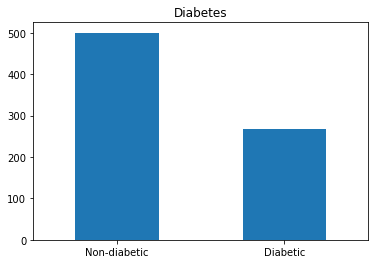

In [15]:
df['diabetes'].value_counts().plot.bar(title= 'Diabetes')
plt.xticks([0,1],['Non-diabetic','Diabetic'],rotation=0)
plt.show()

In [16]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [16]:
# Normalize can be set to True to print proportions instead of number
df['diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: diabetes, dtype: float64

268(around 35%) people out of 768 has the Diabet. In fact the number of patients who are diabetic is half of the patients who are non-diabetic.

This is an imbalenced dataset

##### Independent Variable (Categorical)

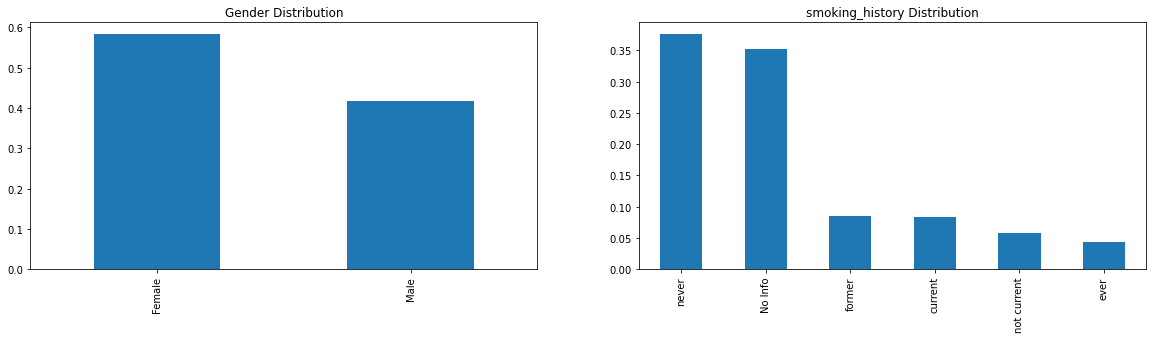

In [17]:
plt.figure(1) 
plt.subplot(221) 
df['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender Distribution') 
plt.subplot(222) 
df['smoking_history'].value_counts(normalize=True).plot.bar(title= 'smoking_history Distribution') 
plt.show()

It can be inferred from the above bar plots that:

58% of people in the dataset are Female.

Around 38% of the people in the dataset had never smoke.


##### Independent Variable (Numerical)

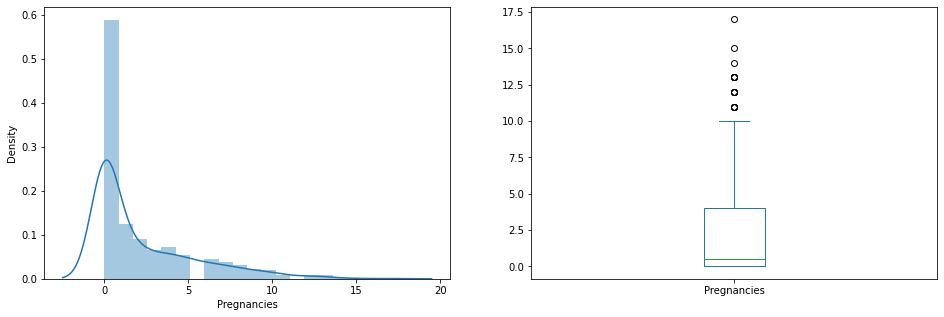

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Pregnancies']); 
plt.subplot(122) 
df['Pregnancies'].plot.box(figsize=(16,5)) 
plt.show()

From the histogram of the 'Pregnancies' column, it is evident that the majority of data points
are concentrated towards the right side of the distribution. 

This skewness indicates that the data is not normally distributed.

We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

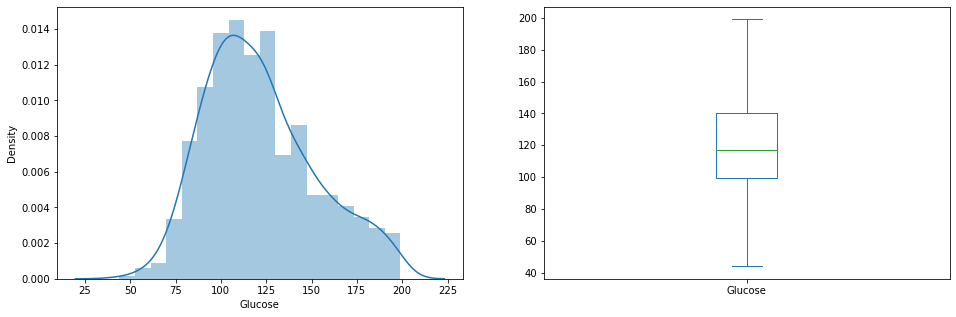

In [19]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Glucose']); 
plt.subplot(122) 
df['Glucose'].plot.box(figsize=(16,5)) 
plt.show()

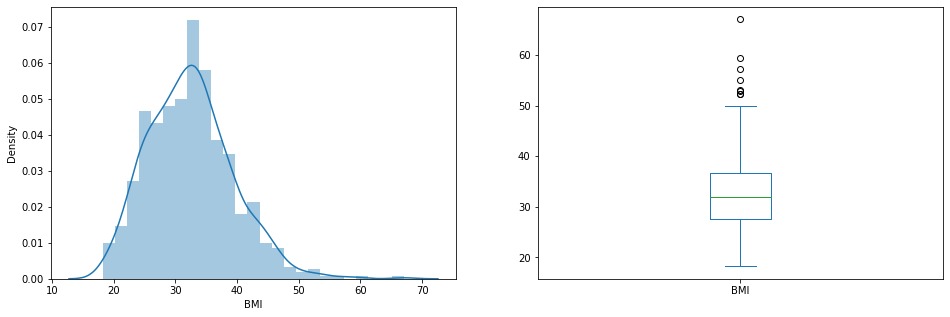

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['BMI']); 
plt.subplot(122) 
df['BMI'].plot.box(figsize=(16,5)) 
plt.show()

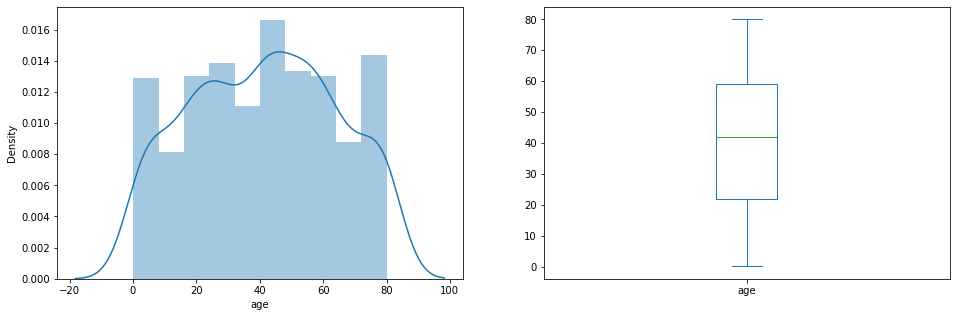

In [21]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['age']); 
plt.subplot(122) 
df['age'].plot.box(figsize=(16,5)) 
plt.show()

##### Bivariate Analysis
Now we would like to know how well each feature correlates with Diabete.

Let’s recall some of the hypotheses that we generated earlier

Hypothesis 1 : Women are more likely to have diabetes than men.

Hypothesis 2 : Older individuals are more likely to have diabetes.

Hypothesis 3 : The number of pregnancies is positively correlated with diabetes risk.
    
Hypothesis 4 : High levels of Glucose are associated with a higher risk of diabetes.

Hypothesis 5 : Individuals with higher BMI are more likely to have diabetes.

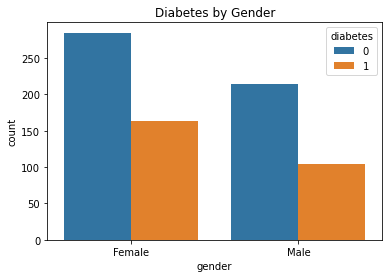

In [22]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Diabetes by Gender')
plt.show()

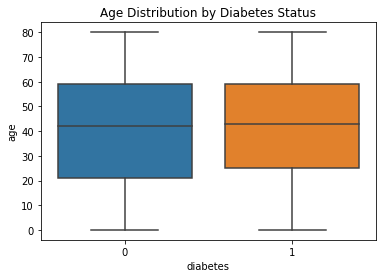

In [23]:
sns.boxplot(data=df, x='diabetes', y='age')
plt.title('Age Distribution by Diabetes Status')
plt.show()

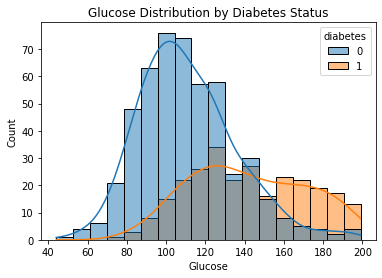

In [24]:
sns.histplot(data=df, x='Glucose', hue='diabetes', kde=True)
plt.title('Glucose Distribution by Diabetes Status')
plt.show()

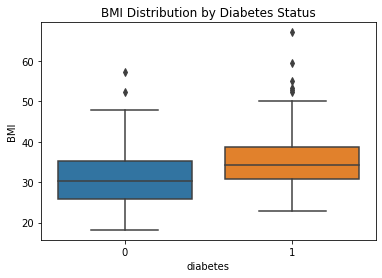

In [25]:
sns.boxplot(data=df, x='diabetes', y='BMI')
plt.title('BMI Distribution by Diabetes Status')
plt.show()

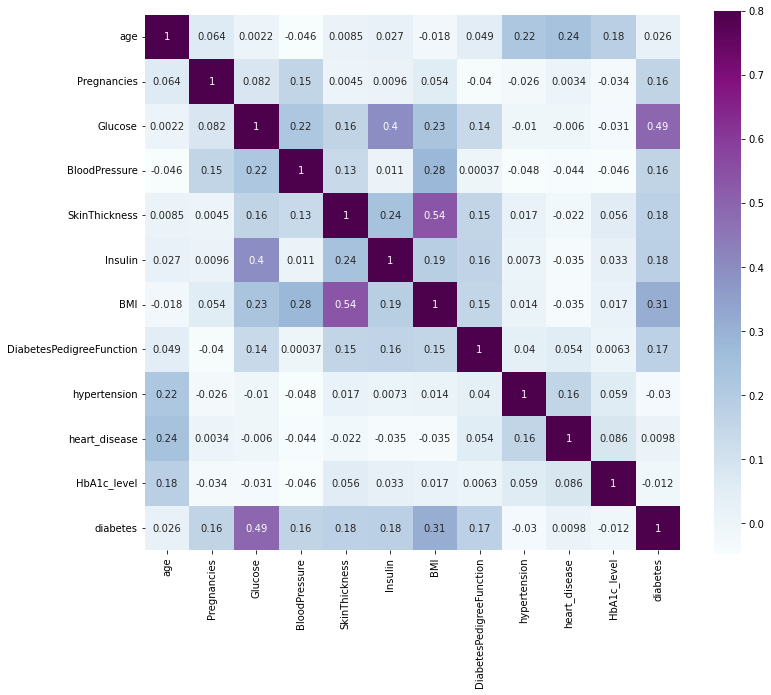

In [26]:
# Now let’s look at the correlation between all the variables.
matrix = df.corr()
f, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(matrix, annot=True,vmax=.8, square=True, cmap="BuPu")
plt.show()

##### Handling Categorical Columns

In [27]:
df.sample(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
402,Female,27.0,5,136.0,84.000000,41.000000,88.000000,35.0,0.286,0.070312,0.03125,never,5.7,1
71,Male,3.0,0,139.0,64.000000,35.000000,140.000000,28.6,0.411,0.070312,0.03125,No Info,6.2,0
453,Female,70.0,2,119.0,69.105469,20.536458,79.799479,19.6,0.832,0.070312,0.03125,never,4.5,0
665,Male,52.0,0,112.0,80.000000,45.000000,132.000000,34.8,0.217,0.070312,0.03125,never,5.8,0
189,Female,77.0,5,139.0,80.000000,35.000000,160.000000,31.6,0.361,0.070312,0.03125,never,6.5,1


In [28]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
df['gender']=df['gender'].map({'Female':0, 'Male':1}).astype('int')

In [30]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [31]:
df['smoking_history']=df['smoking_history'].map({'never':0, 'No Info':1,'current':2,'former':3,'ever':4, 'not current':5 }).astype('int')

In [32]:
df['smoking_history'].value_counts()

0    289
1    270
3     66
2     64
5     45
4     34
Name: smoking_history, dtype: int64

### Store Feature Matrix In X And Response (Target) In Vector y

In [33]:
X = df.drop('diabetes',axis=1)
X

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level
0,0,80.0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,0.070312,1.00000,0,6.6
1,0,54.0,1,85.0,66.0,29.000000,79.799479,26.6,0.351,0.070312,0.03125,1,6.6
2,1,28.0,0,183.0,64.0,20.536458,79.799479,23.3,0.672,0.070312,0.03125,0,5.7
3,0,36.0,1,89.0,66.0,23.000000,94.000000,28.1,0.167,0.070312,0.03125,2,5.0
4,1,76.0,0,137.0,40.0,35.000000,168.000000,43.1,2.288,1.000000,1.00000,2,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,66.0,10,101.0,76.0,48.000000,180.000000,32.9,0.171,0.070312,0.03125,3,5.7
764,1,15.0,0,122.0,70.0,27.000000,79.799479,36.8,0.340,0.070312,0.03125,0,3.5
765,0,21.0,5,121.0,72.0,23.000000,112.000000,26.2,0.245,0.070312,0.03125,4,3.5
766,0,23.0,1,126.0,60.0,20.536458,79.799479,30.1,0.349,0.070312,0.03125,0,6.0


In [34]:
y = df['diabetes']
y 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

### Data Standardization

In [96]:
df.sample(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
12,0,78.0,10,139.0,80.0,20.536458,79.799479,27.1,1.441,0.070312,0.03125,3,5.0,0
59,0,67.0,0,105.0,64.0,41.000000,142.000000,41.5,0.173,0.070312,0.03125,0,8.8,0
603,1,45.0,0,150.0,78.0,29.000000,126.000000,35.2,0.692,0.070312,0.03125,1,5.8,1
683,0,47.0,4,125.0,80.0,20.536458,79.799479,32.3,0.536,0.070312,0.03125,2,6.1,1
345,0,52.0,8,126.0,88.0,36.000000,108.000000,38.5,0.349,1.000000,0.03125,5,5.0,0


In [36]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X=st.fit_transform(X)

In [39]:
X

array([[-0.84515425,  1.68878099,  1.09193362, ...,  5.56776436,
        -0.86426805,  0.90793031],
       [-0.84515425,  0.55541207, -0.91910959, ..., -0.1796053 ,
        -0.17068617,  0.90793031],
       [ 1.18321596, -0.57795685, -0.44043941, ..., -0.1796053 ,
        -0.86426805,  0.10181415],
       ...,
       [-0.84515425, -0.88309464,  0.68972498, ..., -0.1796053 ,
         1.91005949, -1.86869202],
       [-0.84515425, -0.79591241, -0.91910959, ..., -0.1796053 ,
        -0.86426805,  0.37051954],
       [ 1.18321596, -1.58055243, -0.44043941, ..., -0.1796053 ,
        -0.17068617, -0.52516509]])

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [50]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [37]:
model_df

{}

# Model Building:

#### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.7662337662337663
LogisticRegression() Avg cross val score is 0.7695696460402341


In [52]:
model_df

{LogisticRegression(): 76.96}

#### SVC

In [53]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7597402597402597
SVC() Avg cross val score is 0.7434937611408199


In [54]:
model_df

{LogisticRegression(): 76.96, SVC(): 74.35}

#### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.6558441558441559
DecisionTreeClassifier() Avg cross val score is 0.6744418979713098


In [56]:
model_df

{LogisticRegression(): 76.96, SVC(): 74.35, DecisionTreeClassifier(): 67.44}

####  Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7532467532467533
RandomForestClassifier() Avg cross val score is 0.7512944571768101


In [111]:
model_df

{'LogisticRegression()': 77.61,
 'SVC()': 76.57,
 'DecisionTreeClassifier()': 69.66,
 'RandomForestClassifier()': 75.52}

#### Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7532467532467533
GradientBoostingClassifier() Avg cross val score is 0.7396231219760632


In [113]:
model_df

{'LogisticRegression()': 77.61,
 'SVC()': 76.57,
 'DecisionTreeClassifier()': 69.66,
 'RandomForestClassifier()': 75.52,
 'GradientBoostingClassifier()': 73.7}

#### Hyperparameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [62]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [63]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [64]:
rs_log_reg.best_score_

0.7721840251252015

In [65]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

#### SVC

In [66]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

rs_svc = RandomizedSearchCV(svm.SVC(),
                            param_distributions=svc_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)


In [68]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [69]:
rs_svc.best_score_

0.7682794329853153

In [70]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.75}

#### Random Forest Classifier

In [71]:
RandomForestClassifier()

RandomForestClassifier()

In [72]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [73]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [74]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [75]:
rs_rf.best_score_

0.7526355996944233

print("LogisticRegression score Before Hyperparameter Tuning: 77.61")

print("LogisticRegression score after Hyperparameter Tuning: 77.73")

print("\n------------------------------------------------------")

print("SVC score Before Hyperparameter Tuning: 76.44")

print("SVC score after Hyperparameter Tuning: 76.95")

print("\n--------------------------------------------------------")

print("RandomForestClassifier score Before Hyperparameter Tuning: 76.43")

print("RandomForestClassifier score after Hyperparameter Tuning: 75.65")

By comparing the accuracy scores for above models the LogisticRegression  model
has a best accuracy score is : 77.61

#### Save The Model

In [76]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [77]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with hyperparameters
lr = LogisticRegression(C=29.76, penalty='l2') 

# Fit the model to your data
lr.fit(X, y)


LogisticRegression(C=29.76)

In [78]:
import joblib

In [86]:
joblib.dump(lr,'Diabetes')

['Diabetes']

In [87]:
model = joblib.load('diabetes')

In [88]:
df.head(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,0,80.0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,0.070312,1.00000,0,6.6,1
1,0,54.0,1,85.0,66.0,29.000000,79.799479,26.6,0.351,0.070312,0.03125,1,6.6,0
2,1,28.0,0,183.0,64.0,20.536458,79.799479,23.3,0.672,0.070312,0.03125,0,5.7,1
3,0,36.0,1,89.0,66.0,23.000000,94.000000,28.1,0.167,0.070312,0.03125,2,5.0,0
4,1,76.0,0,137.0,40.0,35.000000,168.000000,43.1,2.288,1.000000,1.00000,2,4.8,1


In [89]:
import pandas as pd
df1 = pd.DataFrame({
    'gender':0,
    'age':80.0,
    'Pregnancies':6,
    'Glucose':148,
    'BloodPressure':72,
    'SkinThickness':35,
    'Insulin':0,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'hypertension':0,
    'heart_disease':1,
    'smoking_history':0,
    'HbA1c_level':6.6
},index=[0])

In [90]:
df1

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level
0,0,80.0,6,148,72,35,0,33.6,0.627,0,1,0,6.6


In [91]:
result = model.predict(df1)

In [92]:
if result==1:
    print("Diabetic")
else:
    print("Non-diabetic")

Diabetic


# GUI

In [93]:
from tkinter import *
import joblib
import pandas as pd

In [97]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    p12 = float(e12.get())
    p13 = float(e13.get())
    
    
    df1 = pd.DataFrame({
    'gender':0,
    'age':80.0,
    'Pregnancies':6,
    'Glucose':148,
    'BloodPressure':72,
    'SkinThickness':35,
    'Insulin':0,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'hypertension':0,
    'heart_disease':1,
    'smoking_history':0,
    'HbA1c_level':6.6
},index=[0])
    result = model.predict(df1)
    
    if result == 1:
        Label(master, text="Diabetic").grid(row=31)
    else:
        Label(master, text="Non-diabetic").grid(row=31)
        

master =Tk()
master.title("Diabetes Prediction Using Machine Learning")
label = Label(master,text = "Diabetes Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "gender [Male:1 ,Female:0]").grid(row=1)
Label(master,text = "age").grid(row=2)
Label(master,text = "Pregnancies").grid(row=3)
Label(master,text = "Glucose").grid(row=4)
Label(master,text = "BloodPressure").grid(row=5)
Label(master,text = "SkinThicknes").grid(row=6)
Label(master,text = "Insulin").grid(row=7)
Label(master,text = "BMI").grid(row=8)
Label(master,text = "DiabetesPedigreeFunction").grid(row=9)
Label(master,text = "hypertension").grid(row=10)
Label(master,text = "heart_disease").grid(row=11)
Label(master,text = "smoking_history [never:0, No Info:1,current:2,former:3,ever:4, not current:5]").grid(row=12)
Label(master,text = "HbA1c_level").grid(row=13)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()
    